# **Loan Approval Prediction**

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train_u6lujuX_CVtuZ9i.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "altruistdelhite04/loan-prediction-problem-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-2-2301298695.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

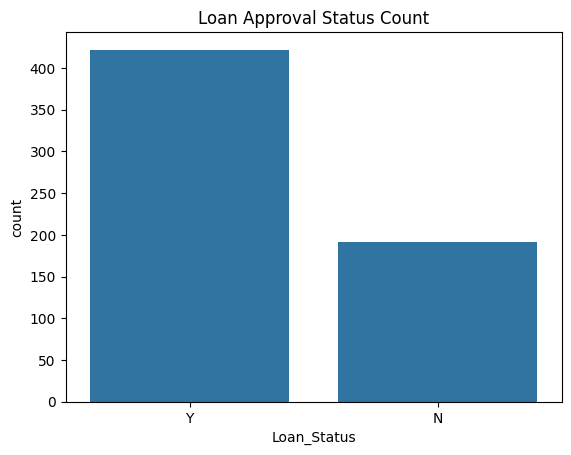

In [4]:
# Exploratory Data Analysis
sns.countplot(data=df, x='Loan_Status')
plt.title("Loan Approval Status Count")
plt.show()

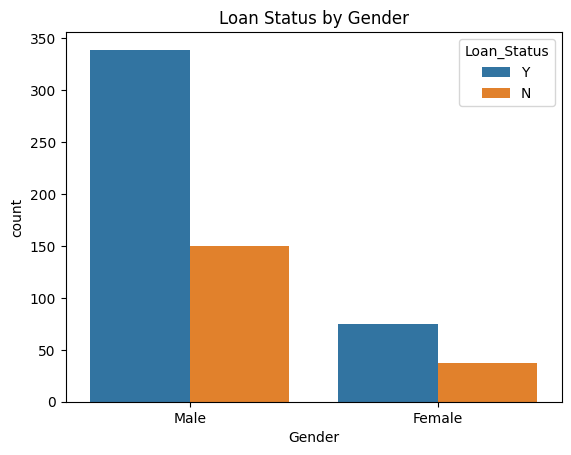

In [5]:
sns.countplot(data=df, x='Gender', hue='Loan_Status')
plt.title("Loan Status by Gender")
plt.show()

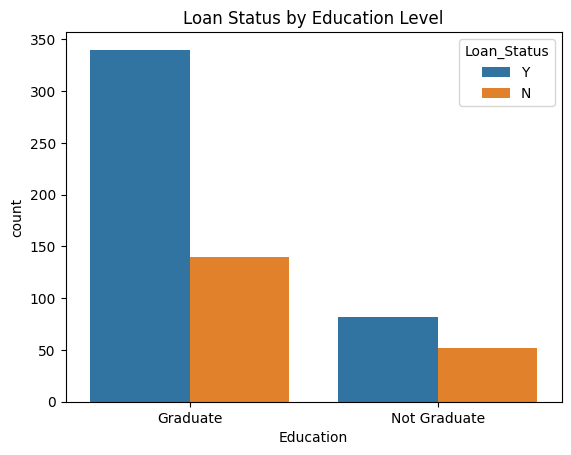

In [6]:
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title("Loan Status by Education Level")
plt.show()

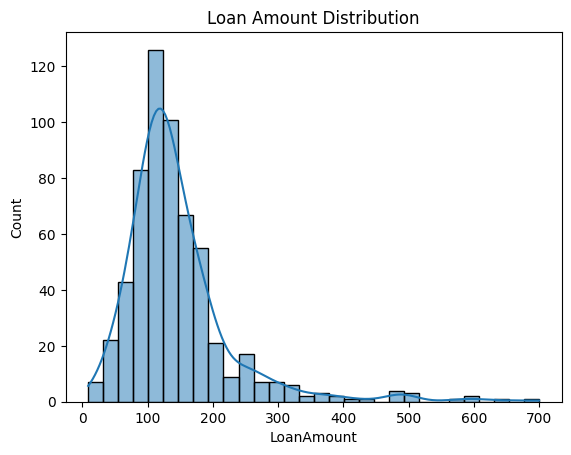

In [7]:
sns.histplot(df['LoanAmount'], kde=True, bins=30)
plt.title("Loan Amount Distribution")
plt.show()

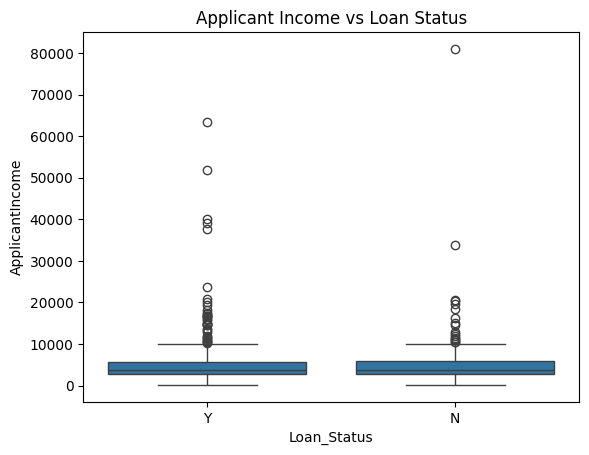

In [8]:
sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome')
plt.title("Applicant Income vs Loan Status")
plt.show()

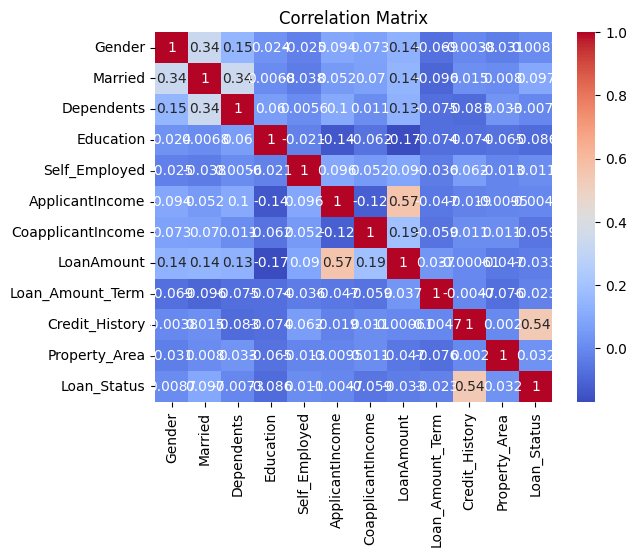

In [11]:
# Fill missing values temporarily for correlation
df_corr = df.copy()

# Replace '3+' in 'Dependents' with a numerical value (e.g., 3 or 4, based on domain knowledge or further analysis)
# For now, let's replace it with 3
df_corr['Dependents'] = df_corr['Dependents'].replace('3+', '3')

df_corr['LoanAmount'] = df_corr['LoanAmount'].fillna(df['LoanAmount'].median())
df_corr['Loan_Amount_Term'] = df_corr['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df_corr['Credit_History'] = df_corr['Credit_History'].fillna(df['Credit_History'].mode()[0])

le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# Drop the 'Loan_ID' column as it's not numerical and not needed for correlation
df_corr = df_corr.drop('Loan_ID', axis=1)

sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Data Preprocessing
# Fill missing values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())


# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [16]:
# Train-Test Split
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),  # Increased max_iter
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss') # Removed use_label_encoder
}

results = []
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = cm
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

In [21]:
# Results
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression  0.788618   0.759615  0.9875  0.858696
1        Random Forest  0.772358   0.754902  0.9625  0.846154
2              XGBoost  0.739837   0.755319  0.8875  0.816092


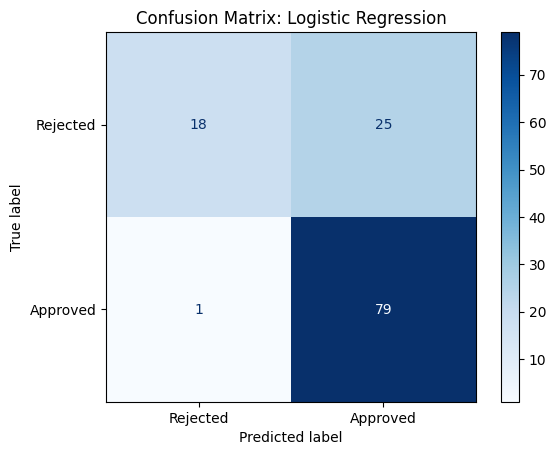

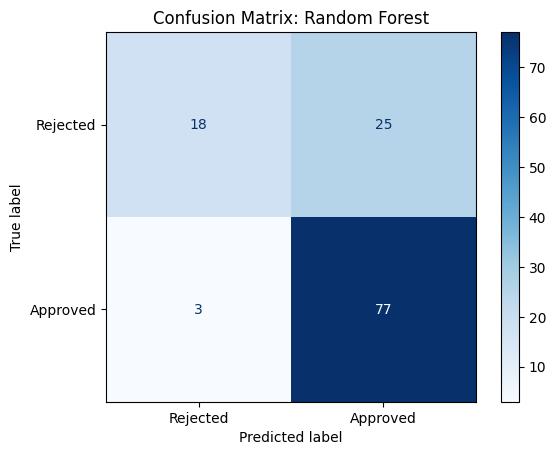

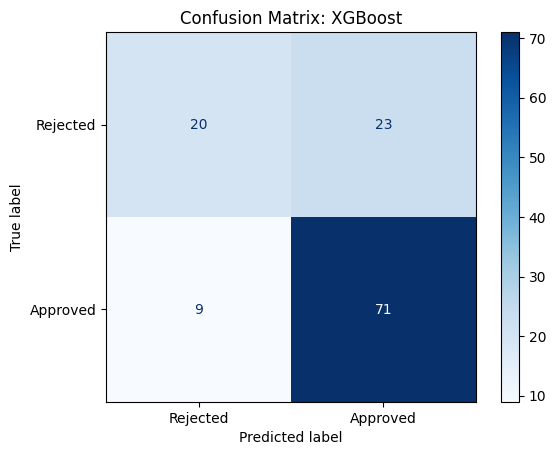

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrices
for name, cm in conf_matrices.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Approved'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.grid(False)
    plt.show()